In [1]:
import pandas as pd
import numpy as np

In [2]:
base_dir = '/shared/2/projects/contextual-appropriateness/data/final-annotated-data/'
df = pd.read_csv(base_dir + 'train' + '.csv')
len(df)

9107

In [3]:
len(df.relationship.unique())

62

In [4]:
df.loc[df['relationship'] == 'old friend', 'relationship'] = 'old_friend'
df.loc[df['relationship'] == 'childhood friend', 'relationship'] = 'childhood_friend'
df.loc[df['relationship'] == 'complete stranger', 'relationship'] = 'complete_stranger'
df.loc[df['relationship'] == 'adopted child', 'relationship'] = 'adopted_child'
df.loc[df['relationship'] == 'uncle_aunt', 'relationship'] = 'uncle/aunt'
df.loc[df['relationship'] == 'employee in large company', 'relationship'] = 'employee_in_large_company'
df.loc[df['relationship'] == 'friends with benefits', 'relationship'] = 'friends_with_benefits'
df.loc[df['relationship'] == 'person having an affair', 'relationship'] = 'person_having_an_affair'
df.loc[df['relationship'] == 'domestic partner', 'relationship'] = 'domestic_partner'
df.loc[df['relationship'] == 'law enforcement', 'relationship'] = 'law_enforcement'
df.loc[df['relationship'] == 'person with authority', 'relationship'] = 'person_with_authority'
df.loc[df['relationship'] == 'sports teammate', 'relationship'] = 'sports_teammate'
df.loc[df['relationship'] == 'club member', 'relationship'] = 'club_member'

In [5]:
len(df)

9107

In [6]:
category_Friend = ['best_friend', 'neighbor','childhood_friend','friend','complete_stranger', 'acquaintance','old_friend',
                   'old friend','childhood friend','complete stranger']
category_Family = ['child', 'parent','adopted_child','grandparent', 'sibling','grandchild','step_sibling','neice_nephew',
                   'cousins','uncle_aunt','adopted child', 'uncle/aunt']
category_Work = ['colleague','employee_in_large_company','coworker','boss','direct_report','employee in large company']
category_Enemy = ['competitor', 'rival', 'enemy']
category_Romance= ['ex_dating','engaged','divorcee','friends_with_benefits','dating', 'person_having_an_affair', 
                   'domestic_partner','married','domestic partner','friends with benefits','person having an affair',
                   ]
category_SocialRoles = ['law_enforcement', 'mentee', 'teacher','doctor', 'person_with_authority', 'mentor', 'student',
                        'lawyer', 'patient','client', 'landlord','person with authority','law enforcement']
category_Teammates = ['classmate','sports_teammate','club_member','sports teammate','club member']
category_Fan = ['fan','hero' ]


In [7]:
#df=df[['quote','relationship','label']]
newdf = df.drop_duplicates(
  subset = ['quote','relationship','label'],
  keep = 'first').reset_index(drop = True)

In [8]:
df2 = newdf.pivot_table(index='quote', columns='relationship', values='label')

In [9]:
df2.head(n=1)

relationship,acquaintance,adopted_child,best_friend,boss,child,childhood_friend,classmate,client,club_member,colleague,...,patient,person_having_an_affair,person_with_authority,rival,sibling,sports_teammate,step_sibling,student,teacher,uncle/aunt
quote,,,,,,,,,,,,,,,,,,,,,
Hope your day is as awesome as you are!,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [10]:
import itertools
key_list = list(df.relationship.unique())
pair_order_list =[]
for i in range(0,len(key_list)):
    for j in range(0,len(key_list)):
        pair_order_list.append((key_list[i],key_list[j]))

In [11]:
tuple_list = []
for each_tuple in pair_order_list:
    rel1 = each_tuple[0]
    rel2 = each_tuple[1]
    #temp_df = main_df[[rel1, rel2]]
    both_app = len(df2[(df2[rel1]==1)& (df2[rel2]==1)])
    den = len(df2[(df2[rel1]==1)])
    conditional_prob = both_app/den
    tuple_list.append((rel1,rel2,conditional_prob))
    
heatmapdf = pd.DataFrame(tuple_list, columns=['rel1', 'rel2', 'prob'])

In [12]:
heatmapdf.loc[heatmapdf['rel1'].isin(category_Friend), 'rel1_cat'] = 'friend'
heatmapdf.loc[heatmapdf['rel1'].isin(category_Family), 'rel1_cat'] = 'family'
heatmapdf.loc[heatmapdf['rel1'].isin(category_Work), 'rel1_cat'] = 'work'
heatmapdf.loc[heatmapdf['rel1'].isin(category_Enemy), 'rel1_cat'] = 'enemy'
heatmapdf.loc[heatmapdf['rel1'].isin(category_Romance), 'rel1_cat'] = 'romance'
heatmapdf.loc[heatmapdf['rel1'].isin(category_SocialRoles), 'rel1_cat'] = 'socialRole'
heatmapdf.loc[heatmapdf['rel1'].isin(category_Teammates), 'rel1_cat'] = 'teammates'
heatmapdf.loc[heatmapdf['rel1'].isin(category_Fan), 'rel1_cat'] = 'fan'

heatmapdf.loc[heatmapdf['rel2'].isin(category_Friend), 'rel2_cat'] = 'friend'
heatmapdf.loc[heatmapdf['rel2'].isin(category_Family), 'rel2_cat'] = 'family'
heatmapdf.loc[heatmapdf['rel2'].isin(category_Work), 'rel2_cat'] = 'work'
heatmapdf.loc[heatmapdf['rel2'].isin(category_Enemy), 'rel2_cat'] = 'enemy'
heatmapdf.loc[heatmapdf['rel2'].isin(category_Romance), 'rel2_cat'] = 'romance'
heatmapdf.loc[heatmapdf['rel2'].isin(category_SocialRoles), 'rel2_cat'] = 'socialRole'
heatmapdf.loc[heatmapdf['rel2'].isin(category_Teammates), 'rel2_cat'] = 'teammates'
heatmapdf.loc[heatmapdf['rel2'].isin(category_Fan), 'rel2_cat'] = 'fan'


In [13]:
sorted(heatmapdf.rel1_cat.unique())

['enemy',
 'family',
 'fan',
 'friend',
 'romance',
 'socialRole',
 'teammates',
 'work']

In [126]:
orders=[]
#for cat in sorted(heatmapdf.rel1_cat.unique()):
for cat in ['family','friend','romance','work','teammates','fan','socialRole','enemy']:
    df3_orig=heatmapdf[(heatmapdf.rel1_cat==cat)&(heatmapdf.rel2_cat==cat)]
    df31=df3_orig[['rel1','prob']]
    #df32=df3_orig[['rel2','prob']]
    df31.columns=['rel','prob']
    #df32.columns=['rel','prob']
    #df3_concat=pd.concat([df31,df32],axis=0)
    #df3=df3_concat.groupby(['rel']).mean().reset_index().sort_values(by=['prob'],ascending=False)
    df3=df31.groupby(['rel']).mean().reset_index().sort_values(by=['prob'],ascending=False)
    orders.extend(list(df3.rel))

print(orders)

# get full data for heatmap
out=[]
for rel1 in orders:
    line_out=[]
    for rel2 in orders:
        val=heatmapdf[(heatmapdf.rel1==rel1)&(heatmapdf.rel2==rel2)]['prob']
        line_out.append(float(val))
        #print(rel1, rel2,float(val))
    out.append(line_out)

['neice_nephew', 'adopted_child', 'grandchild', 'child', 'uncle/aunt', 'grandparent', 'cousins', 'step_sibling', 'sibling', 'parent', 'acquaintance', 'complete_stranger', 'neighbor', 'childhood_friend', 'old_friend', 'friend', 'best_friend', 'person_having_an_affair', 'domestic_partner', 'divorcee', 'ex_dating', 'friends_with_benefits', 'engaged', 'dating', 'married', 'direct_report', 'employee_in_large_company', 'boss', 'colleague', 'coworker', 'club_member', 'classmate', 'sports_teammate', 'fan', 'hero', 'landlord', 'patient', 'client', 'person_with_authority', 'lawyer', 'law_enforcement', 'student', 'mentee', 'doctor', 'teacher', 'mentor', 'rival', 'competitor', 'enemy']


In [121]:
['sibling', 'cousins', 'step_sibling', 'parent', 'uncle/aunt', 'grandparent', 'adopted_child', 'grandchild', 'child', 'neice_nephew']

,rel,prob
7,sibling,0.863401
2,cousins,0.823216
8,step_sibling,0.819557
6,parent,0.818188
9,uncle/aunt,0.753131
4,grandparent,0.719047
0,adopted_child,0.658995
3,grandchild,0.656745
1,child,0.568504
5,neice_nephew,0.465469


In [127]:
df3

,rel,prob
2,rival,0.929825
0,competitor,0.873563
1,enemy,0.860215


In [114]:
heatmapdf

,rel1,rel2,prob,rel1_cat,rel2_cat
0,ex_dating,ex_dating,1.000000,romance,romance
1,ex_dating,colleague,0.493827,romance,work
2,ex_dating,engaged,0.820988,romance,romance
3,ex_dating,best_friend,0.851852,romance,friend
4,ex_dating,neighbor,0.500000,romance,friend
...,...,...,...,...,...
2396,hero,landlord,0.724138,fan,socialRole
2397,hero,rival,0.517241,fan,enemy
2398,hero,enemy,0.517241,fan,enemy
2399,hero,fan,0.862069,fan,fan


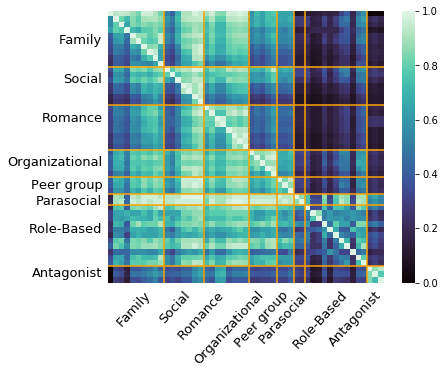

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt
arr=np.array(out)
#arr=np.abs(arr)
plt.figure(figsize=(6.5,5.3))
#plt.figure(figsize=(6,6))
#plt.figure(figsize=(14, 14))
sns.color_palette("mako", as_cmap=True)
p=sns.heatmap(
    data=arr,
    #cmap="rocket_r",
    #cmap="vlag",
    cmap = "mako",
    vmax=1.0,
#     vmin=-1.0
    vmin=0,
#     xticklabels=False,
#     yticklabels=False
)


p.axis('off')
#lines=[3,13,15,22,30,42,44,]
lines=[10,17,25,30,33,35,46]
# p.tick_params(left=False,bottom=False)
#old
# p.hlines(lines, *p.get_xlim(), color='green')
# p.vlines(lines, *p.get_ylim(), color='green')
# p.text(-4,2, 'Rivals',fontsize=13, horizontalalignment='right') #R, up
# p.text(-4,8, 'Family',fontsize=13, horizontalalignment='right')
# p.text(-4,15, 'Hero',fontsize=13, horizontalalignment='right')
# p.text(-4,19, 'Friend',fontsize=13, horizontalalignment='right')
# p.text(-4,27, 'Romance',fontsize=13, horizontalalignment='right')
# p.text(-4,37, 'Social Role',fontsize=13, horizontalalignment='right')
# p.text(-4,43.5, 'Teammate',fontsize=13, horizontalalignment='right')
# p.text(-4,48, 'Work',fontsize=13, horizontalalignment='right')

# p.text(3,54, 'Rivals',fontsize=13,rotation=45,horizontalalignment='right',verticalalignment='top') #L, up
# p.text(10,54, 'Family',fontsize=13,rotation=45,horizontalalignment='right',verticalalignment='top')
# p.text(15,54, 'Hero',fontsize=13,rotation=45,horizontalalignment='right',verticalalignment='top')
# p.text(19,54, 'Friend',fontsize=13,rotation=45,horizontalalignment='right',verticalalignment='top')
# p.text(28,54, 'Romance',fontsize=13,rotation=45,horizontalalignment='right',verticalalignment='top')
# p.text(37,54, 'Social Role',fontsize=13,rotation=45,horizontalalignment='right',verticalalignment='top')
# p.text(45,54, 'Teammate',fontsize=13,rotation=45,horizontalalignment='right',verticalalignment='top')
# p.text(49,54, 'Work',fontsize=13,rotation=45,horizontalalignment='right',verticalalignment='top')

#new 'family','friend','romance','work','teammates','fan','socialRole','enemy'
p.hlines(lines, *p.get_xlim(), color='orange')
p.vlines(lines, *p.get_ylim(), color='orange')
p.text(-1,6, 'Family',fontsize=13, horizontalalignment='right') #R, up
p.text(-1,13, 'Social',fontsize=13, horizontalalignment='right')
p.text(-1,20, 'Romance',fontsize=13, horizontalalignment='right')
p.text(-1,28, 'Organizational',fontsize=13, horizontalalignment='right')
p.text(-1,32, 'Peer group',fontsize=13, horizontalalignment='right')
p.text(-1,35, 'Parasocial',fontsize=13, horizontalalignment='right')
p.text(-1,40, 'Role-Based',fontsize=13, horizontalalignment='right')
p.text(-1,48, 'Antagonist',fontsize=13, horizontalalignment='right')

p.text(8,50, 'Family',fontsize=13,rotation=47,horizontalalignment='right',verticalalignment='top') #L, up
p.text(15,50, 'Social',fontsize=13,rotation=47,horizontalalignment='right',verticalalignment='top')
p.text(21,50, 'Romance',fontsize=13,rotation=47,horizontalalignment='right',verticalalignment='top')
p.text(28,50, 'Organizational',fontsize=13,rotation=47,horizontalalignment='right',verticalalignment='top')
p.text(32.5,50, 'Peer group',fontsize=13,rotation=47,horizontalalignment='right',verticalalignment='top')
p.text(36,50, 'Parasocial',fontsize=13,rotation=47,horizontalalignment='right',verticalalignment='top')
p.text(43,50, 'Role-Based',fontsize=13,rotation=47,horizontalalignment='right',verticalalignment='top')
p.text(49,50, 'Antagonist',fontsize=13,rotation=47,horizontalalignment='right',verticalalignment='top')

plt.tight_layout()
plt.savefig('/shared/3/projects/agrimaTwitter/heatmap-sorted.pdf',
           bbox_inches='tight', pad_inches=0.0)

In [61]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# piv = pd.pivot_table(heatmapdf, values="prob",index=["rel1"], columns=["rel2"])
# plt.figure(figsize=(14, 14))
# ax = sns.heatmap(piv)
# figure = ax.get_figure() 

In [9]:
#duplicate = newdf[newdf.duplicated(['quote','relationship','label'])]